# CamoCrops 2025 Dataset Analysis and Preprocessing
### 1. Initial Imports Cell

In [28]:
import os
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


### 2. Dataset Stats Function Cell

In [29]:
def get_dataset_stats():
    dataset_path = 'CamoCrops_2025/Images'
    stats = {
        'total_images': 0,
        'splits': defaultdict(int)
    }
    
    # Get immediate subdirectories (train/val/test)
    splits = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    
    for split in splits:
        split_path = os.path.join(dataset_path, split)
        images = [f for f in os.listdir(split_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        stats['splits'][split] = len(images)
        stats['total_images'] += len(images)
                
    return stats

# Run and store results
dataset_stats = get_dataset_stats()


### 3. Visualization Cell

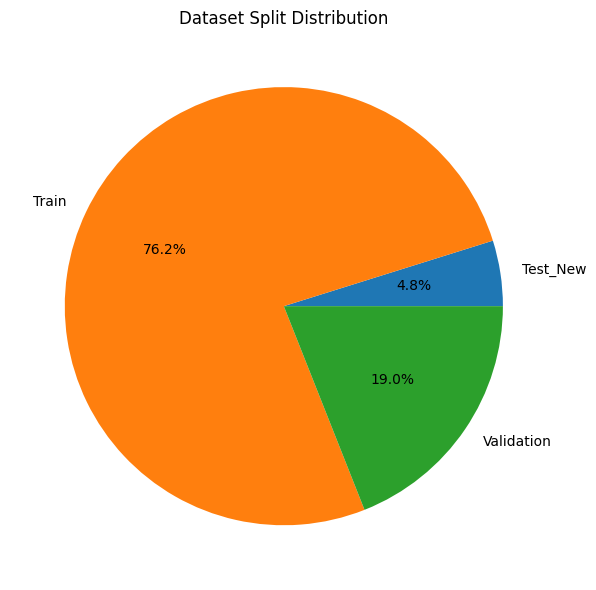

In [30]:
def plot_dataset_distribution(stats):
    plt.figure(figsize=(10, 6))
    
    # Split distribution
    plt.pie(stats['splits'].values(), labels=stats['splits'].keys(), autopct='%1.1f%%')
    plt.title('Dataset Split Distribution')
    plt.tight_layout()
    plt.show()

# Create visualization
plot_dataset_distribution(dataset_stats)


## 4. Dataset Summary
Let's create a summary table:

In [31]:
# Create split summary
split_summary = pd.DataFrame({
    'Split': list(dataset_stats['splits'].keys()),
    'Image Count': list(dataset_stats['splits'].values()),
    'Percentage': [count/dataset_stats['total_images']*100 for count in dataset_stats['splits'].values()]
})

print(f"Total Images: {dataset_stats['total_images']}")
print("\nDataset Split Summary:")
display(split_summary)


Total Images: 14398

Dataset Split Summary:


,Split,Image Count,Percentage
0,Test_New,696,4.834005
1,Train,10967,76.170301
2,Validation,2735,18.995694


## 5. Show bounding images with their respective bounding boxes

In [32]:

def plot_image_with_annotations(image_path, annotation_path, ax):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Parse XML
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    
    # Draw each bounding box
    for obj in root.findall('object'):
        name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(float(bbox.find('xmin').text))
        ymin = int(float(bbox.find('ymin').text))
        xmax = int(float(bbox.find('xmax').text))
        ymax = int(float(bbox.find('ymax').text))
        
        # Draw rectangle
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        
        # Add label
        cv2.putText(image, name, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    ax.imshow(image)
    ax.axis('off')


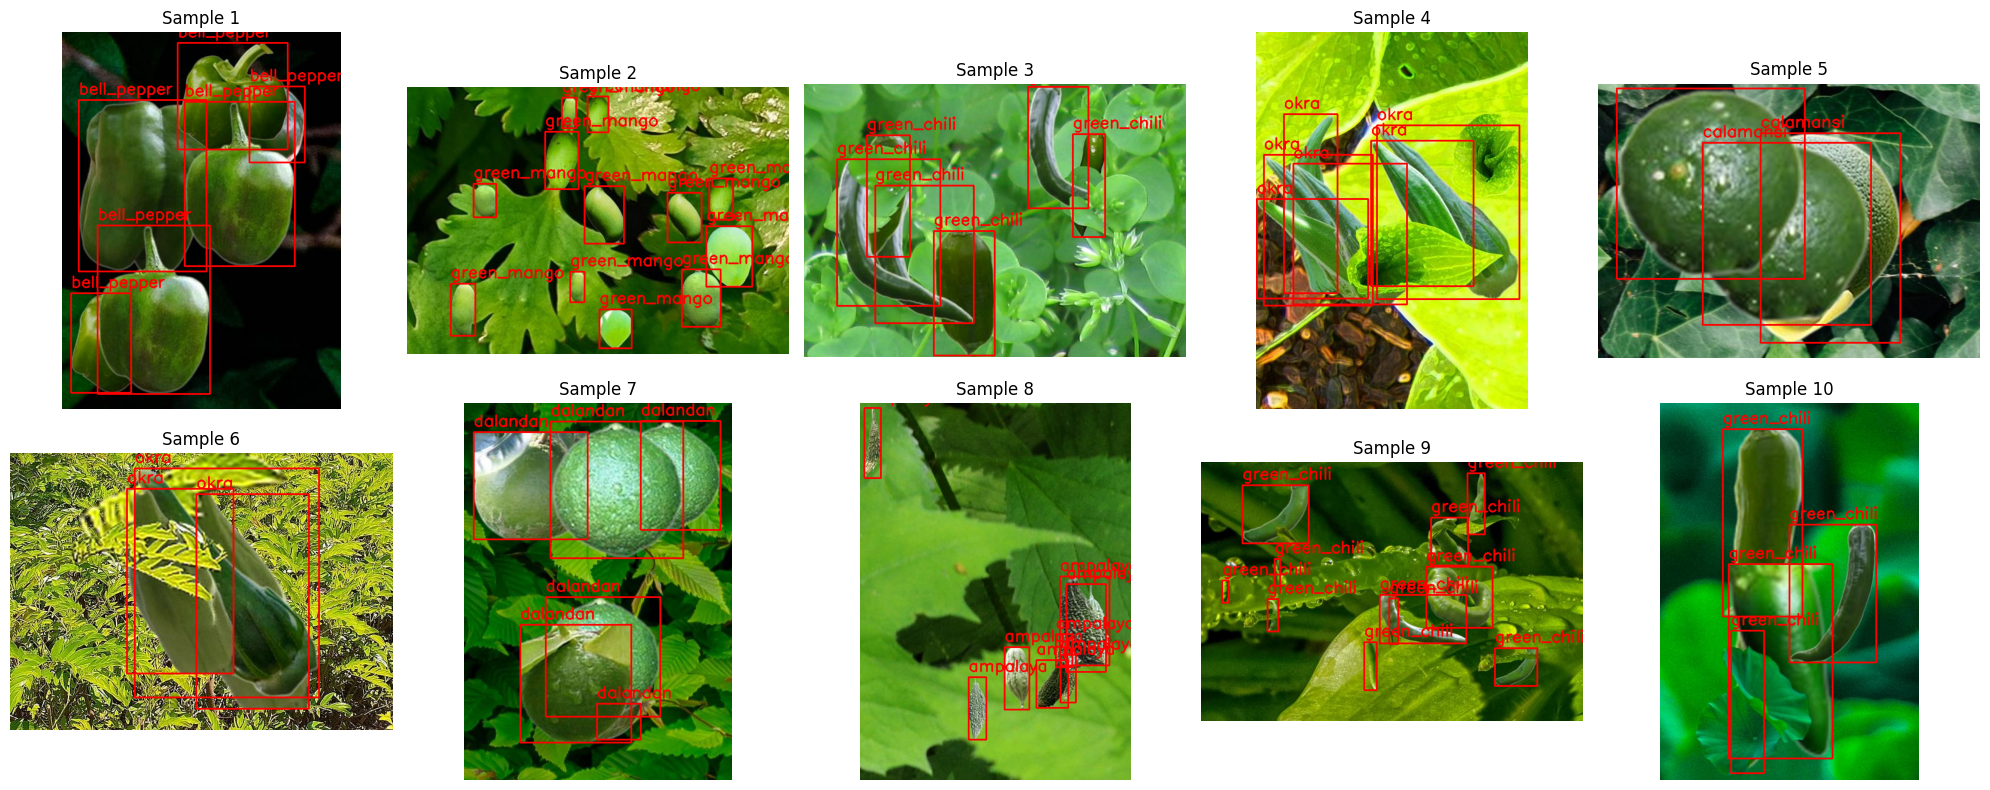

In [34]:
def visualize_random_samples(num_samples=10):
    base_path = 'CamoCrops_2025'
    splits = ['train', 'val', 'test']
    
    # Collect all annotation paths
    all_annotations = []
    for split in splits:
        ann_path = os.path.join(base_path, 'Annotations', split)
        if os.path.exists(ann_path):
            annotations = [os.path.join(ann_path, f) for f in os.listdir(ann_path) if f.endswith('.xml')]
            all_annotations.extend(annotations)
    
    # Select random samples
    selected_annotations = random.sample(all_annotations, min(num_samples, len(all_annotations)))
    
    # Create subplot grid
    rows = (num_samples + 4) // 5  # 5 images per row
    cols = min(5, num_samples)
    fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
    axes = axes.ravel() if num_samples > 1 else [axes]
    
    for idx, ann_path in enumerate(selected_annotations):
        # Get corresponding image path
        img_name = os.path.splitext(os.path.basename(ann_path))[0] + '.jpg'
        img_path = ann_path.replace('Annotations', 'Images').replace('.xml', '.jpg')
        
        # Plot image with annotations
        plot_image_with_annotations(img_path, ann_path, axes[idx])
        axes[idx].set_title(f'Sample {idx+1}')
    
    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_random_samples(10)
